In [1]:
import numpy as np
import math
from time import time
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
seed = 42
np.random.seed(seed)  # set random seed

In [3]:
def convolution_binomial(n, p):
    u = np.random.uniform(size=n)  # generate n instances ui
    x = (u < p).sum()  # count the number x of variables Ui that are smaller than p
    return x

In [4]:
def inverse_transform_binomial(n, p):
    a = math.pow(1-p, n)
    b = p / (1-p)

    P = a
    F = a

    u = np.random.uniform()
    for i in range(n):
        if u <= F:
            x = i
            return x

        P = (n-i)/(i+1) * b * P
        F = F + P

    return -1

In [5]:
def geometric_binomial(n, p):
    q = 0  # init parameter
    for m in range(1, n):
        u = np.random.uniform()
        g = math.ceil(math.log(u)) / math.log(1-p)  # compute geometric
        q += g
        if q > n:
            return m - 1

    return -1

In [6]:
def compute_efficiency(n, p, k):
    start_1 = time()
    l_1 = []
    for i in range(k):
        l_1.append(convolution_binomial(n, p))
    end_1 = time()

    start_2 = time()
    l_2 = []
    for i in range(k):
        l_2.append(inverse_transform_binomial(n, p))
    end_2 = time()

    start_3 = time()
    l_3 = []
    for i in range(k):
        l_3.append(convolution_binomial(n, p))
    end_3 = time()

    return l_1, end_1-start_1, l_2, end_2-start_2, l_3, end_3-start_3

In [7]:
n = 100
p = 0.1

l_1, t_1, l_2, t_2, l_3, t_3 = compute_efficiency(n, p, int(1e6))

In [8]:
t_1, t_2, t_3

(12.150554180145264, 6.483595371246338, 9.105464220046997)

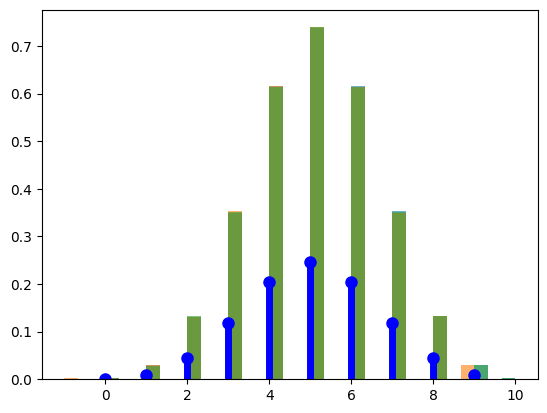

In [118]:
fig, ax = plt.subplots(1, 1)
ax.hist(l_1, 30, density=True, alpha=0.6)
ax.hist(l_2, 30, density=True, alpha=0.6)
ax.hist(l_3, 30, density=True, alpha=0.6)

x = np.arange(sp.stats.binom.ppf(0.0001, n, p),
              sp.stats.binom.ppf(0.9999, n, p))
ax.plot(x, sp.stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, sp.stats.binom.pmf(x, n, p), colors='b', lw=5)

plt.show()

In [28]:
# generate Gaussian
# truncate the interval in [-5sigma, 5sigma]

def gaussian_generator(plot=False):
    mean = 0
    sigma = 1
    a = -sigma * 5
    b = sigma * 5
    c = sp.stats.norm(mean, sigma).pdf(0)
    if plot:
        fig, ax = plt.subplots(1, 1)
        x = np.linspace(sp.stats.norm.ppf(0.00001), sp.stats.norm.ppf(0.99999), 100)
        ax.plot(x, sp.stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
    while True:
        x = np.random.uniform(a, b)  # [a, b]
        y = np.random.uniform(0, c)  # [0, c]
        if plot:
            ax.plot(x, y, marker="o", markersize=4)
        if y <= sp.stats.norm(mean, sigma).pdf(x):
            return x


1.310773910039237

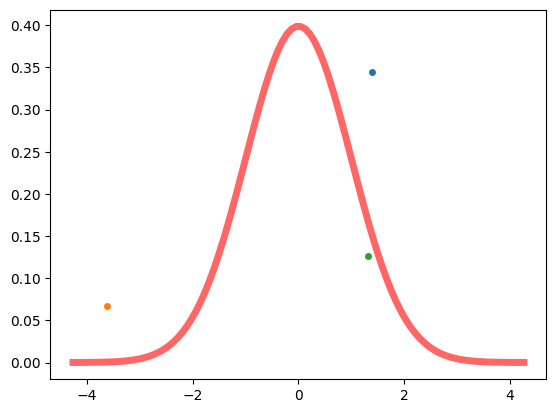

In [36]:
gaussian_generator(plot=True)

In [12]:
start = time()
l = [gaussian_generator() for i in range(0, 1000)]  # sample 1000 points from custom normal generator
end = time()

t_l = end - start  # compute total time
print(t_l)

5.18993067741394


In [13]:
start = time()
m = [np.random.normal() for i in range(0, 1000)]  # sample 1000 points from the numpy normal generator
end = time()

t_m = end - start  # compute total time
print(t_m)

0.003296375274658203


In [14]:
print(f"time custom generator: {t_l}s")
print(f"time numpy generator: {t_m}s")

time custom generator: 5.18993067741394s
time numpy generator: 0.003296375274658203s


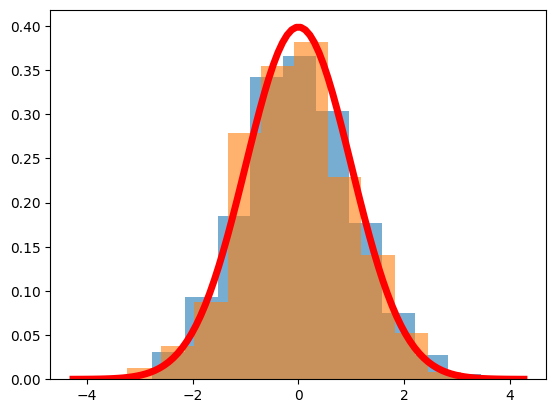

In [89]:
fig, ax = plt.subplots(1, 1)

ax.hist(l, 10, density=True, alpha=0.6)
ax.hist(m, 10, density=True, alpha=0.6)
x = np.linspace(sp.stats.norm.ppf(0.00001), sp.stats.norm.ppf(0.99999), 100)
ax.plot(x, sp.stats.norm.pdf(x), 'r-', lw=5, label='norm pdf')

plt.show()

In [43]:
b = 0.775
sp.stats.rice.mean(0)
sp.stats.rice.pdf(1.25, 0)

0.5722917022145179

In [78]:
# Rice distribution simulator using the acceptance-rejection method
def rice_generator(nu=0, plot=False):
    a = 0  # support [0, inf)
    b = 5  # c.d.f. is basically 1 for x >= 5 if nu = 0
    mean = sp.stats.rice.mean(nu)  # compute mean
    c = sp.stats.rice.pdf(mean, nu)  # compute max value of the p.d.f.
    if plot:
        fig, ax = plt.subplots(1, 1)
        x = np.linspace(sp.stats.rice.ppf(0.01, nu), sp.stats.rice.ppf(0.99, nu), 100)
        ax.plot(x, sp.stats.rice.pdf(x, nu), 'r-', lw=5, alpha=0.6, label='rice pdf')
    while True:
        x = np.random.uniform(a, b)  # [a, b]
        y = np.random.uniform(0, c)  # [0, c]
        if plot:
            ax.plot(x, y, marker="o", markersize=4)
        if y <= sp.stats.rice.pdf(x, nu):
            return x

1.0080359290360335

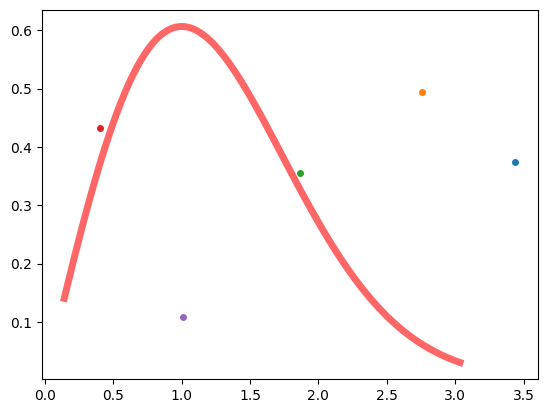

In [83]:
rice_generator(plot=True)

time custom generator: 0.9291977882385254s
time scipy generator: 0.05204176902770996s


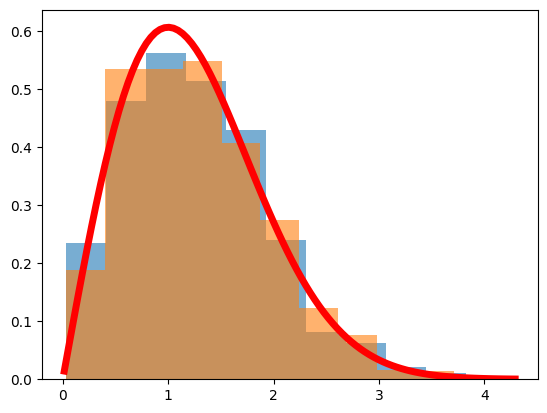

In [100]:
start = time()
l = [rice_generator() for i in range(0, 1000)]  # sample 1000 points from custom rice generator
end = time()
t_l = end - start  # compute total time

start = time()
m = [sp.stats.rice.rvs(0) for i in range(0, 1000)]  # sample 1000 points from the scipy rice generator
end = time()
t_m = end - start  # compute total time

print(f"time custom generator: {t_l}s")
print(f"time scipy generator: {t_m}s")
fig, ax = plt.subplots(1, 1)

ax.hist(l, 10, density=True, alpha=0.6)
ax.hist(m, 10, density=True, alpha=0.6)
x = np.linspace(sp.stats.rice.ppf(0.0001, 0), sp.stats.rice.ppf(0.9999, 0), 100)
ax.plot(x, sp.stats.rice.pdf(x, 0), 'r-', lw=5, label='rice pdf')

plt.show()